In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay

In [2]:
#pip install keras

In [3]:
#pip install imbalanced-learn

In [4]:
#pip install tensorflow

In [5]:
df = pd.read_csv('data.csv',sep=';')

In [6]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
def plotting_3_chart(df_normalized, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df_normalized.loc[:,feature], norm_hist=True, ax = ax1)

    ax2 = fig.add_subplot(grid[1, :2])

    ax2.set_title('QQ_plot')
    stats.probplot(df_normalized.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df_normalized.loc[:,feature], orient='v', ax = ax3 );

In [10]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [11]:
df['Target'] = df['Target'].replace({'Dropout': 1, 'Graduate': 2, 'Enrolled': 3})

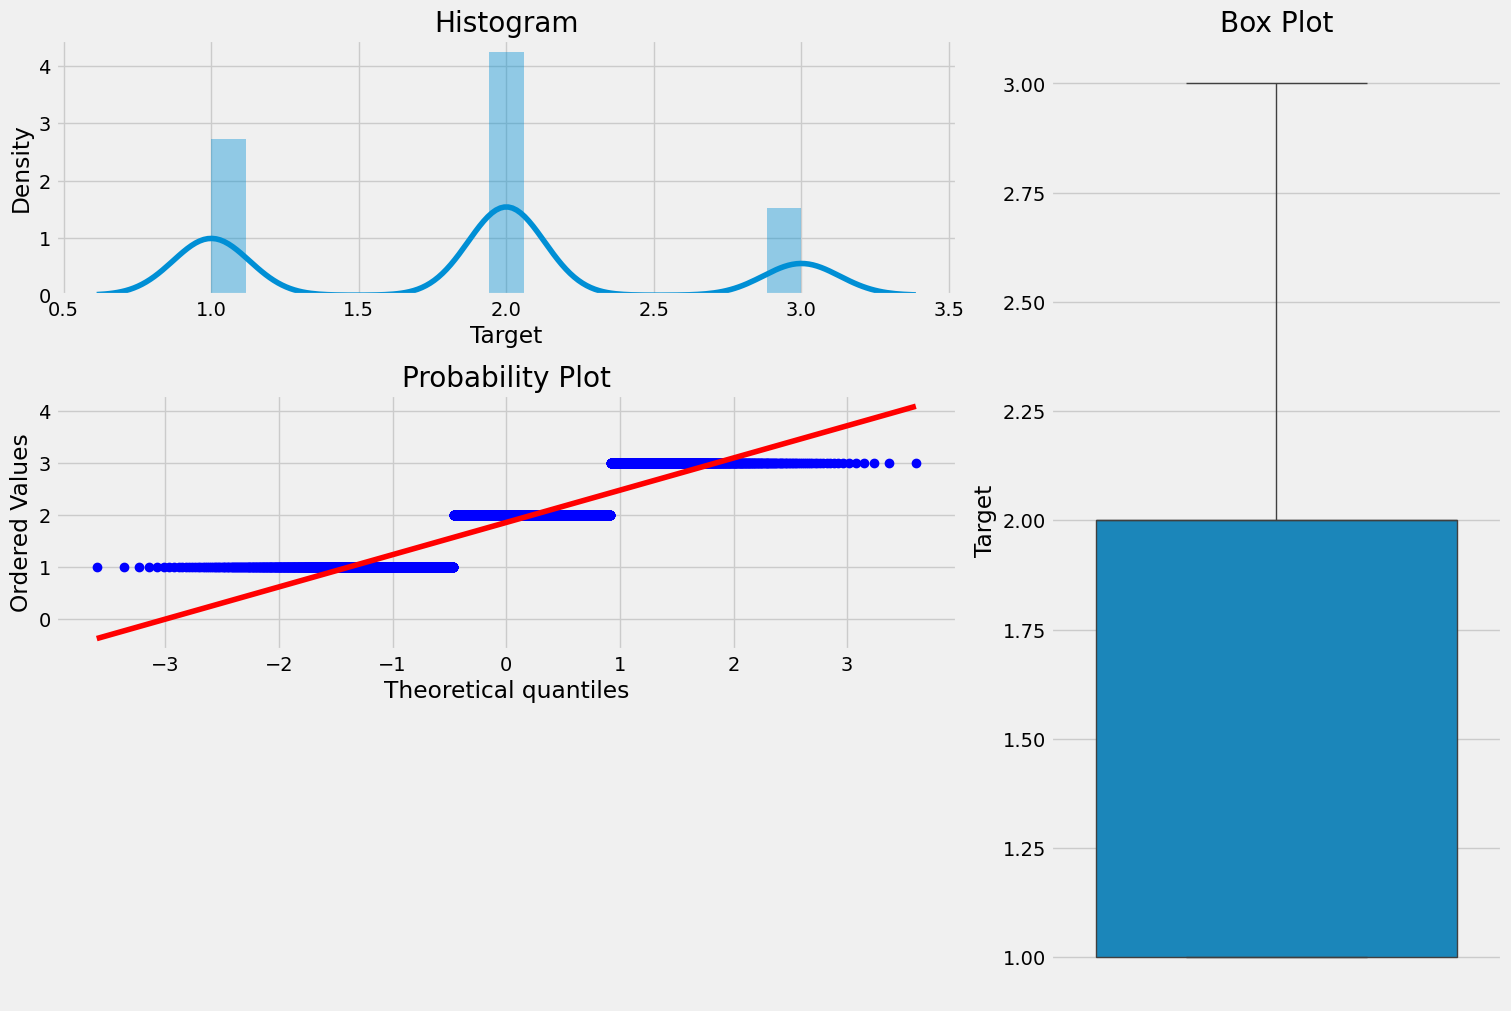

In [12]:
plotting_3_chart(df,'Target')

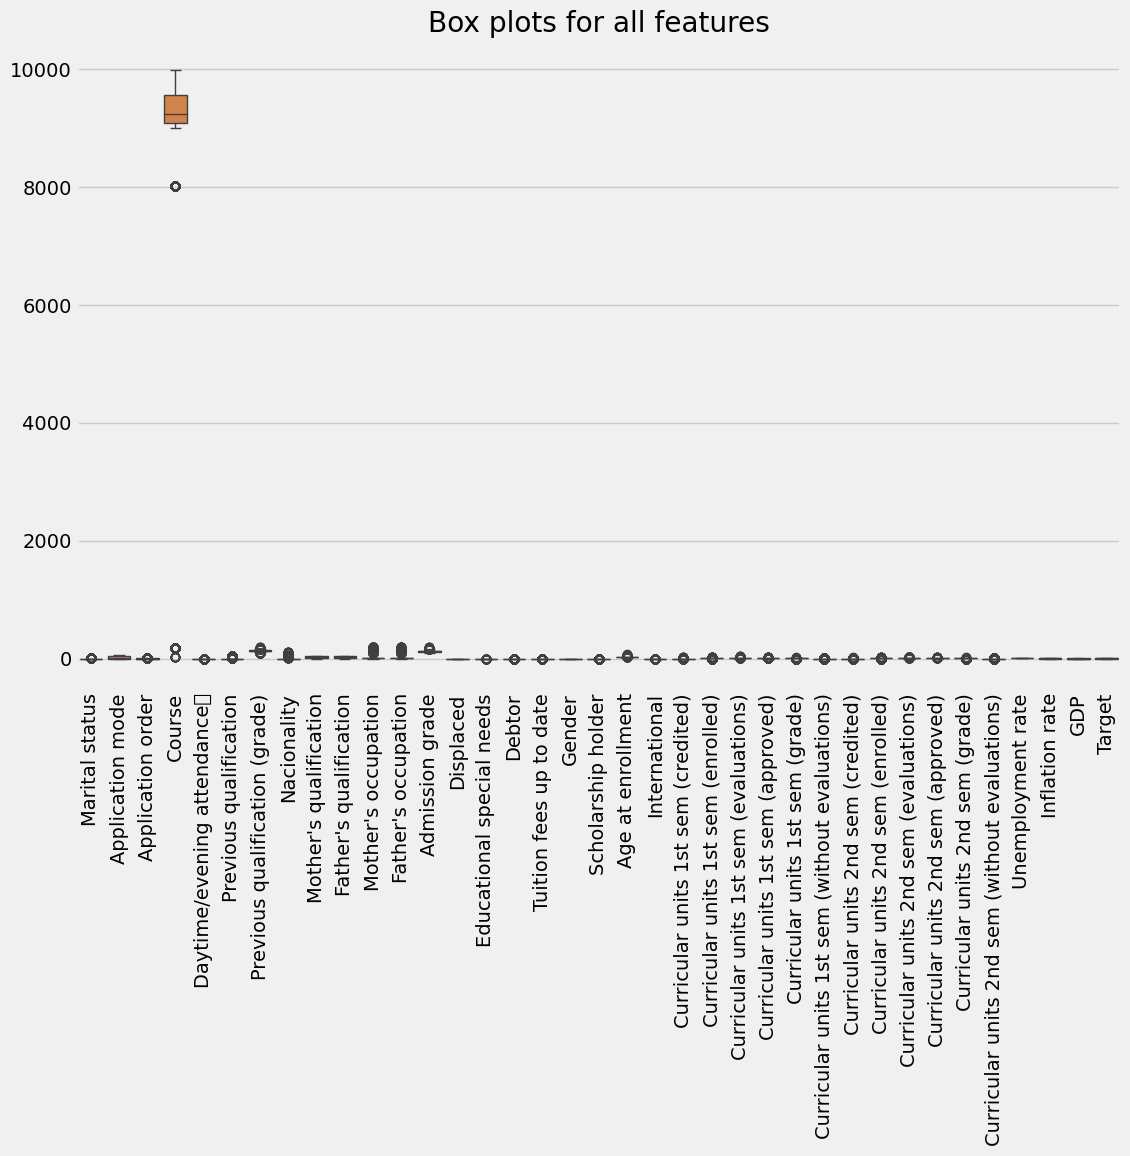

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size if needed
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate the labels if necessary for readability
plt.title('Box plots for all features')
plt.show()


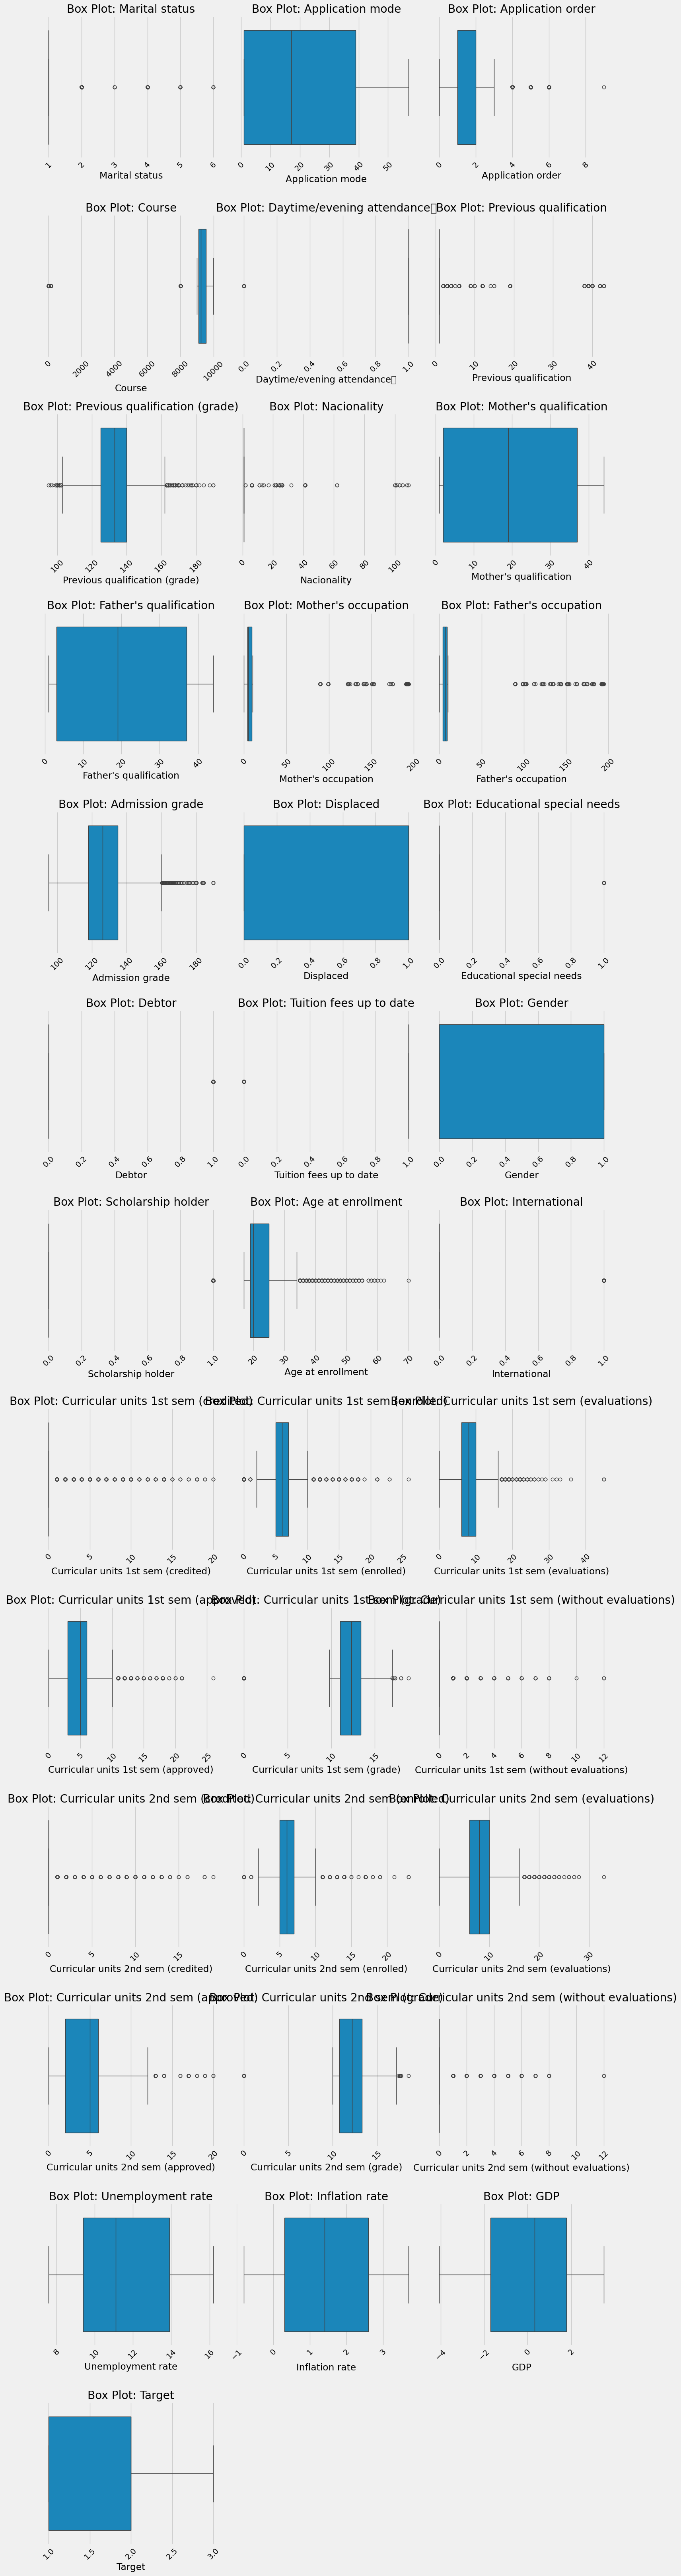

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Determine grid size
n = len(numerical_features)
cols = 3  # Number of columns in the grid
rows = (n // cols) + (1 if n % cols != 0 else 0)  # Calculate rows needed based on number of features

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot: {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [15]:
df3 = df[df['Target'] == 3]

df = df[df['Target'] != 3]



In [16]:
df3

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
16,1,18,1,9238,1,1,137.0,1,19,38,...,0,6,14,2,11.000000,0,10.8,1.4,1.74,3
19,1,1,1,9853,1,1,140.0,1,19,19,...,0,7,8,6,13.500000,0,16.2,0.3,-0.92,3
21,1,18,4,9556,1,1,127.0,1,1,38,...,0,8,9,8,11.425000,0,12.7,3.7,-1.70,3
25,1,1,1,9238,1,1,151.0,1,19,38,...,0,6,12,4,11.000000,0,7.6,2.6,0.32,3
27,1,1,1,9085,1,1,138.0,1,19,19,...,0,5,7,4,13.000000,0,9.4,-0.8,-3.12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1,5,4,9853,1,1,116.0,1,3,38,...,0,6,9,3,11.666667,0,9.4,-0.8,-3.12,3
4402,1,18,2,9853,1,1,168.0,1,1,19,...,0,6,6,6,13.000000,0,10.8,1.4,1.74,3
4406,1,1,1,9070,1,1,145.0,1,1,38,...,0,6,8,2,11.333333,0,10.8,1.4,1.74,3
4412,1,43,1,9070,1,1,125.0,1,19,19,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,3


In [17]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,1.608540
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,1.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,1.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,2.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


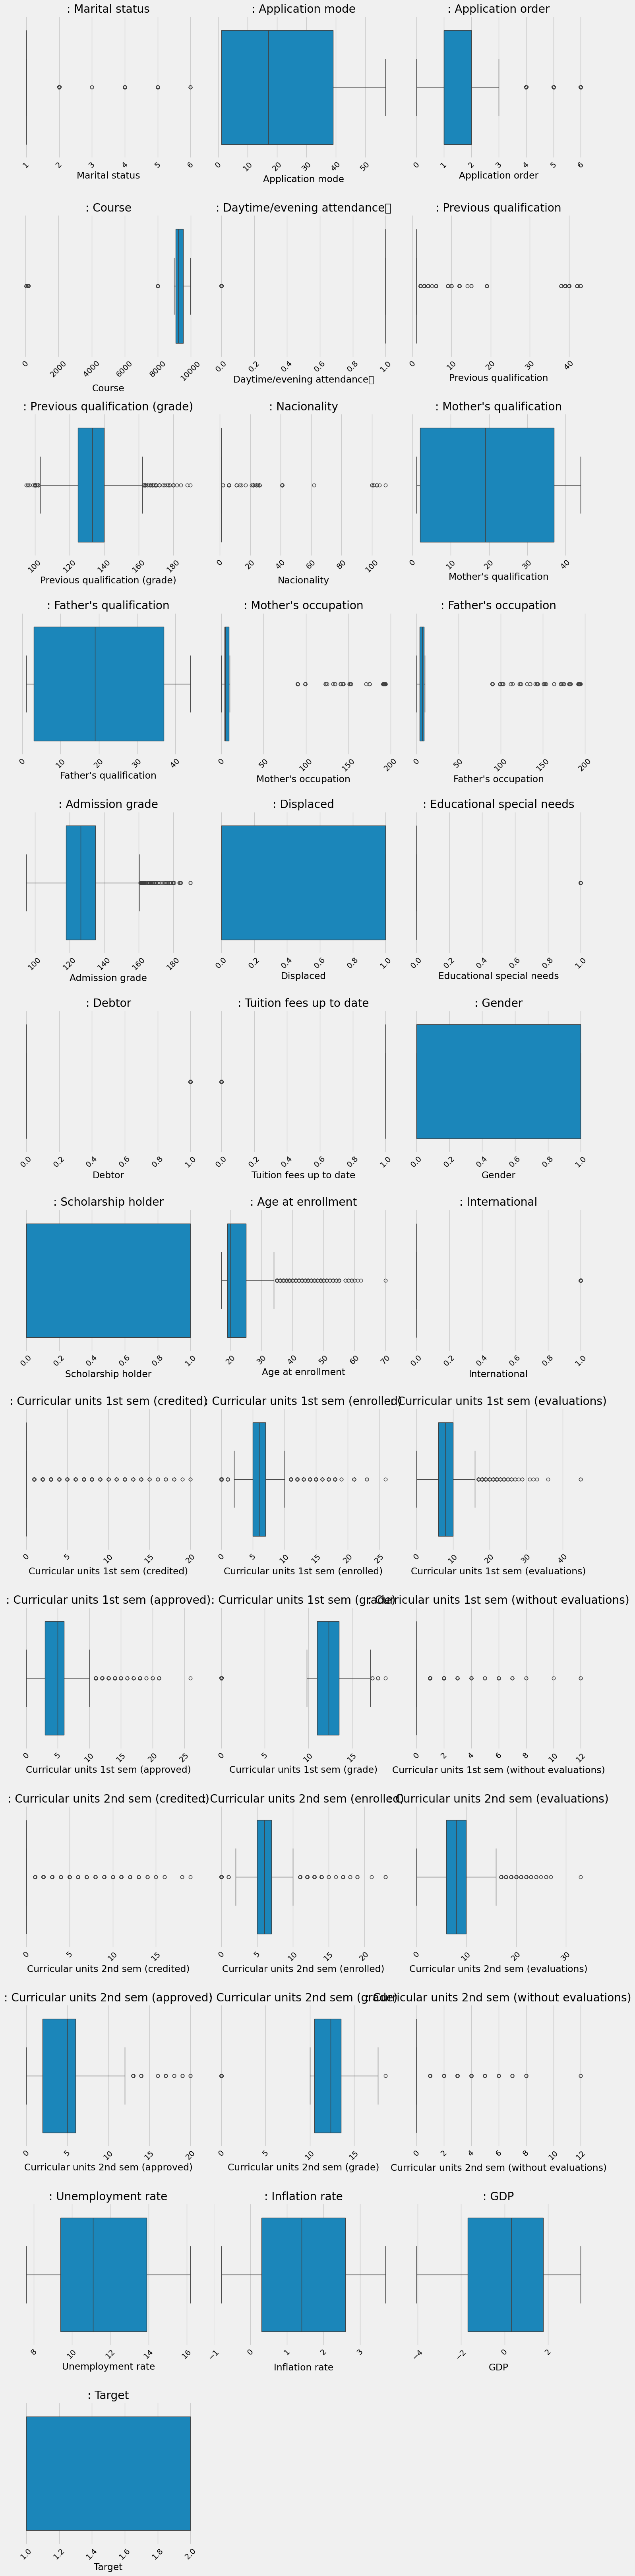

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Determine grid size
n = len(numerical_features)
cols = 3  # Number of columns in the grid
rows = (n // cols) + (1 if n % cols != 0 else 0)  # Calculate rows needed based on number of features

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f': {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [19]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [20]:
df.isnull().sum()#checking for null values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [21]:
df.duplicated().sum()#checking for duplicated values

np.int64(0)

In [22]:
df1=df.copy()

In [23]:
def min_max_scaling(df_n):

    df_norm = df_n.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm
df_normalized = min_max_scaling(df1)

df_normalized

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.833333,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
1,0.0,0.250000,0.166667,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,1.0
2,0.0,0.000000,0.833333,0.907512,1.0,0.0,0.284211,0.000000,0.837209,0.837209,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
3,0.0,0.285714,0.333333,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,1.0
4,0.2,0.678571,0.166667,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.860465,...,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,1.000000,0.978108,1.0,0.0,0.315789,0.000000,0.000000,0.000000,...,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,1.0
4420,0.0,0.000000,0.333333,0.978108,1.0,0.0,0.263158,0.962963,0.000000,0.000000,...,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,0.0
4421,0.0,0.000000,0.166667,0.950693,1.0,0.0,0.621053,0.000000,0.837209,0.837209,...,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,0.0
4422,0.0,0.000000,0.166667,0.915244,1.0,0.0,0.894737,0.000000,0.837209,0.837209,...,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,1.0


In [24]:
df_normalized.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,0.036860,0.311103,0.291690,0.885819,0.887603,0.084101,0.399164,0.007668,0.441540,0.501666,...,0.030622,0.273757,0.235245,0.225923,0.540408,0.011846,0.468646,0.451466,0.535105,0.608540
std,0.122602,0.309975,0.222305,0.207749,0.315897,0.238670,0.139351,0.061737,0.362448,0.355243,...,0.106457,0.098392,0.120126,0.158119,0.295171,0.062306,0.310192,0.307758,0.298545,0.488144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.909018,1.000000,0.000000,0.315789,0.000000,0.023256,0.046512,...,0.000000,0.217391,0.181818,0.100000,0.566346,0.000000,0.209302,0.244444,0.311757,0.000000
50%,0.000000,0.285714,0.166667,0.925989,1.000000,0.000000,0.401053,0.000000,0.418605,0.418605,...,0.000000,0.260870,0.242424,0.250000,0.664103,0.000000,0.406977,0.488889,0.578600,1.000000
75%,0.000000,0.678571,0.333333,0.956317,1.000000,0.000000,0.473684,0.000000,0.837209,0.837209,...,0.000000,0.304348,0.303030,0.300000,0.726923,0.000000,0.732558,0.755556,0.772787,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


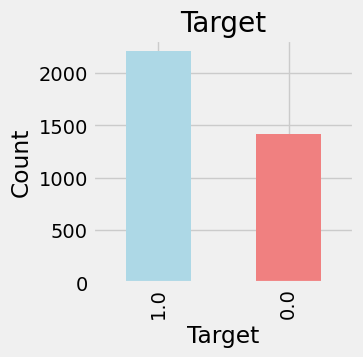

In [25]:
import matplotlib.pyplot as plt

# Assuming df_normalized['Target'] exists and contains the target values
counts = df_normalized['Target'].value_counts()

# Plot
plt.figure(figsize=(3, 3))

# Set coral for the first bar and blue for the second (adjust if there are more than 2 categories)
counts.plot(kind='bar', color=[ 'lightblue','lightcoral'][:len(counts)])

# Title and labels
plt.title('Target')
plt.xlabel('Target')
plt.ylabel('Count')

# Display the plot
plt.show()


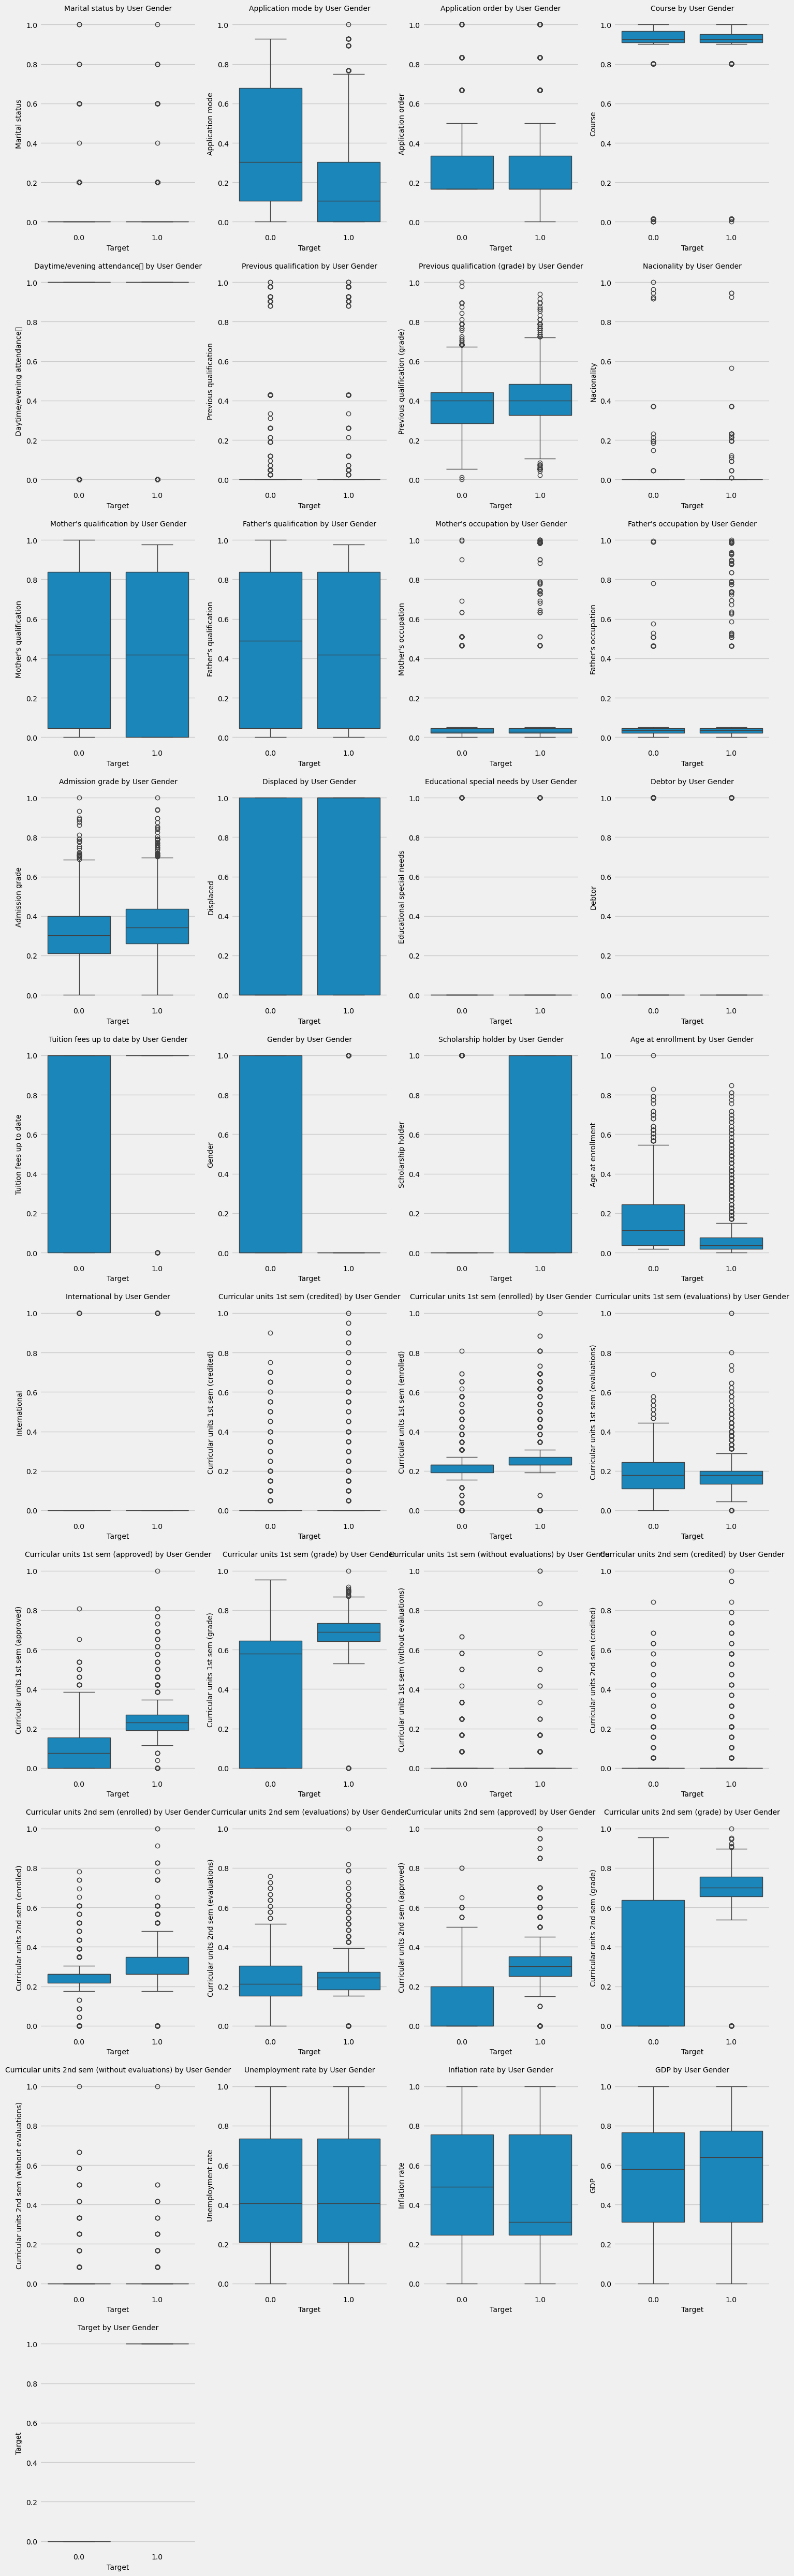

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_normalized is your DataFrame

# Calculate number of rows needed for 4 columns per row
num_columns = len(df_normalized.columns)
num_rows = int(np.ceil(num_columns / 4))  # Use ceiling to round up if needed

# Create a dynamic grid of subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5 * num_rows))  # Adjust figure height based on rows

# Flatten axes array to easily index it
axes = axes.flatten()

# Define the colors for the boxplots
colors = ['lightcoral', 'lightblue']  # List of colors to alternate between

# Iterate over columns of df_normalized
for i, column in enumerate(df_normalized.columns):
    # Choose color based on the index, alternating between lightcoral and lightblue
     # Use modulo to alternate between colors
    
    # Plot boxplot in the appropriate subplot with specified color
    sns.boxplot(x='Target', y=column, data=df_normalized, ax=axes[i])
    
    # Set title and labels
    axes[i].set_title(f'{column} by User Gender', fontsize=10)
    axes[i].set_xlabel('Target', fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)
    axes[i].tick_params(labelsize=10)

# Hide unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [27]:
df2=df_normalized.copy()

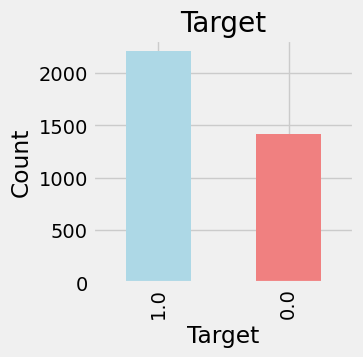

In [28]:
import matplotlib.pyplot as plt

# Assuming df_normalized['Target'] exists and contains the target values
counts = df_normalized['Target'].value_counts()

# Plot
plt.figure(figsize=(3, 3))

# Set coral for the first bar and blue for the second (adjust if there are more than 2 categories)
counts.plot(kind='bar', color=[ 'lightblue','lightcoral'][:len(counts)])

# Title and labels
plt.title('Target')
plt.xlabel('Target')
plt.ylabel('Count')

# Display the plot
plt.show()


In [29]:
X = df_normalized.drop(['Target'], axis = 1)
y = df_normalized['Target']
y.value_counts().to_frame().T

Target,1.0,0.0
count,2209,1421


In [30]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [31]:
y_resampled.value_counts().to_frame().T

Target,0.0,1.0
count,2209,2209


In [32]:
X_train, X_test, y_transformed, y_transformed1 = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

# Feature selection

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Apply Logistic Regression with L1 regularization
clf_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
clf_lasso.fit(X_train, y_transformed)

# Select important features using Lasso
selector = SelectFromModel(clf_lasso, prefit=True)
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)


Selected features: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')


# Models

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluation(model):
   # model.fit(X_train, y_transformed)
    ypred = model.predict(X_test)
    ypred = (ypred > 0.5).astype(int)
    # Plot confusion matrix using ConfusionMatrixDisplay
    cm = confusion_matrix(y_transformed1, ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_resampled.unique())
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    
    # Print classification report
    print(classification_report(y_transformed1, ypred))
    return ypred

In [35]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# Define the model
model_seq = Sequential()
model_seq.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
model_seq.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model_seq.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons

# Output layer for binary classification (1 unit with sigmoid activation)
model_seq.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid for binary classification

# Compile the model
model_seq.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_seq.fit(X_train, y_transformed, epochs=10, batch_size=32, validation_data=(X_test, y_transformed1))

# Evaluate the model
test_loss, test_acc = model_seq.evaluate(X_test, y_transformed1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


2025-01-16 08:50:17.391588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 08:50:17.395365: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 08:50:17.404130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737017417.418472   41952 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737017417.422742   41952 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 08:50:17.442956: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/10


2025-01-16 08:50:19.066363: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6779 - loss: 0.6122 - val_accuracy: 0.8665 - val_loss: 0.3379
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.3200 - val_accuracy: 0.9084 - val_loss: 0.2700
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8802 - loss: 0.3030 - val_accuracy: 0.9129 - val_loss: 0.2514
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9024 - loss: 0.2602 - val_accuracy: 0.9084 - val_loss: 0.2420
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - loss: 0.2628 - val_accuracy: 0.9106 - val_loss: 0.2367
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2479 - val_accuracy: 0.9072 - val_loss: 0.2315
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9076 - loss: 0.2365 - val_accuracy: 0.8971 - val_loss: 0.2477
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9087 - loss: 0.2340 - val_accuracy: 0.9050 - val_

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


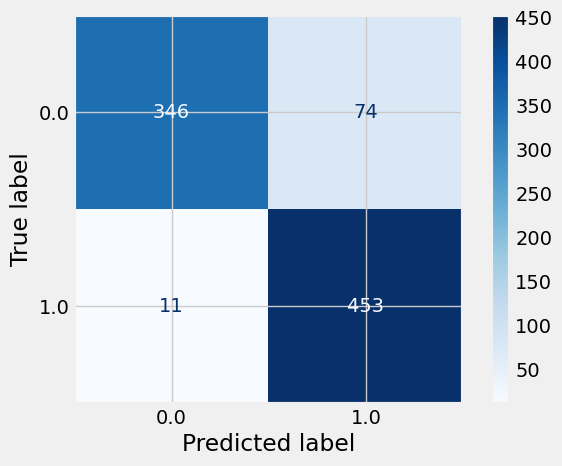

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       420
         1.0       0.86      0.98      0.91       464

    accuracy                           0.90       884
   macro avg       0.91      0.90      0.90       884
weighted avg       0.91      0.90      0.90       884



In [36]:
ypred_seq=evaluation(model_seq)

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import numpy as np

# Convert pandas DataFrame to numpy arrays
X_train1 = X_train.values
X_test1 = X_test.values

# Reshape data into 4D for CNN input (batch_size, height, width, channels)
X_train_reshaped = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)  # Adding 1 channel dimension
X_test_reshaped = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)  # Adding 1 channel dimension

# Define the model for binary classification
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))

# Output layer for binary classification (1 unit with sigmoid activation)
model_cnn.add(Dense(1, activation='sigmoid'))  # Single neuron for binary classification

# Compile the model with binary crossentropy loss for binary classification
model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_cnn.fit(X_train_reshaped, y_transformed, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_transformed1))

# Evaluate the model
test_loss, test_acc = model_cnn.evaluate(X_test_reshaped, y_transformed1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7494 - loss: 0.5629 - val_accuracy: 0.8722 - val_loss: 0.3309
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8724 - loss: 0.3520 - val_accuracy: 0.8993 - val_loss: 0.2681
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8903 - loss: 0.2912 - val_accuracy: 0.9016 - val_loss: 0.2628
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8995 - loss: 0.2693 - val_accuracy: 0.9050 - val_loss: 0.2493
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8905 - loss: 0.2657 - val_accuracy: 0.9061 - val_loss: 0.2429
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8968 - loss: 0.2570 - val_accuracy: 0.9005 - val_loss: 0.2300
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8987 - loss: 0.2437 - val_accuracy: 0.9095 - val_loss: 0.2302
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9058 - loss: 0.2531 - val_accuracy: 0.

In [38]:
X_test1_reshaped = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1, 1)
ypred_cnn=model_cnn.predict(X_test1_reshaped)
#ypred1=ypred.values
ypred_cnn = (ypred_cnn > 0.5).astype(int)
print(classification_report(y_transformed1, ypred_cnn))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91       420
         1.0       0.89      0.96      0.92       464

    accuracy                           0.92       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.92      0.91       884



In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import numpy as np

# Convert the DataFrame to a numpy array (assuming X_train is a pandas DataFrame)
X_train_numpy = X_train.values  # This converts the pandas DataFrame to a numpy array
X_test1 = X_test.values
# Reshape data into 3D for LSTM (batch_size, time_steps, features)
X_train_reshaped = X_train_numpy.reshape(X_train_numpy.shape[0], 1, X_train_numpy.shape[1])  # For time series data
X_test_reshaped = X_test1.reshape(X_test1.shape[0], 1,
                                  X_test1.shape[1])  # Adding 1 channel dimension

# Define the model
model_lstm = Sequential()

# LSTM layer with 64 units and 'relu' activation function
model_lstm.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))

# Dense layer with 32 units
model_lstm.add(Dense(32, activation='relu'))

# Output layer for binary classification (1 unit with sigmoid activation)
model_lstm.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid for binary classification

# Compile the model with binary crossentropy loss for binary classification
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(X_train_reshaped, y_transformed, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_transformed1))

# Evaluate the model
test_loss, test_acc = model_lstm.evaluate(X_test_reshaped, y_transformed1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6006 - loss: 0.6521 - val_accuracy: 0.8665 - val_loss: 0.3777
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8510 - loss: 0.3715 - val_accuracy: 0.9072 - val_loss: 0.2785
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8806 - loss: 0.3112 - val_accuracy: 0.9084 - val_loss: 0.2545
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8834 - loss: 0.2821 - val_accuracy: 0.8971 - val_loss: 0.2634
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8915 - loss: 0.2766 - val_accuracy: 0.8993 - val_loss: 0.2377
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8935 - loss: 0.2584 - val_accuracy: 0.9140 - val_loss: 0.2345
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8953 - loss: 0.2615 - val_accuracy: 0.9038 - val_loss: 0.2468
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9047 - loss: 0.2402 - val_accuracy: 0.

In [40]:
X_test1_reshaped = X_test1.reshape(X_test1.shape[0],1, X_test1.shape[1])
ypred_lstm=model_lstm.predict(X_test1_reshaped)
#ypred1=ypred.values
ypred_lstm = (ypred_lstm > 0.5).astype(int)
print(classification_report(y_transformed1, ypred_lstm))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       420
         1.0       0.92      0.90      0.91       464

    accuracy                           0.90       884
   macro avg       0.90      0.90      0.90       884
weighted avg       0.90      0.90      0.90       884



In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np

# Ensure that X_train and X_test are numpy arrays (if they are pandas DataFrames)
X_train_numpy = X_train.values
X_test_numpy = X_test.values

# Define the model
model_d = Sequential()

# Add first dense layer with 64 neurons and ReLU activation
model_d.add(Dense(64, input_dim=X_train_numpy.shape[1], activation='relu'))

# Add dropout layer to prevent overfitting
model_d.add(Dropout(0.5))

# Add second dense layer with 32 neurons and ReLU activation
model_d.add(Dense(32, activation='relu'))

# Add another dropout layer
model_d.add(Dropout(0.5))

# Output layer for binary classification (1 unit with sigmoid activation)
model_d.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid for binary classification

# Compile the model with binary crossentropy loss for binary classification
model_d.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_d.fit(X_train_numpy, y_transformed, epochs=10, batch_size=32, validation_data=(X_test_numpy, y_transformed1))

# Evaluate the model
test_loss, test_acc = model_d.evaluate(X_test_numpy, y_transformed1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5783 - loss: 0.6776 - val_accuracy: 0.8428 - val_loss: 0.4816
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.5328 - val_accuracy: 0.8643 - val_loss: 0.3707
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8134 - loss: 0.4310 - val_accuracy: 0.8790 - val_loss: 0.3143
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.3927 - val_accuracy: 0.8925 - val_loss: 0.2951
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8470 - loss: 0.3821 - val_accuracy: 0.8778 - val_loss: 0.2948
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.3482 - val_accuracy: 0.8925 - val_loss: 0.2704
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.3581 - val_accuracy: 0.9016 - val_loss: 0.2602
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3357 - val_accuracy: 0.

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


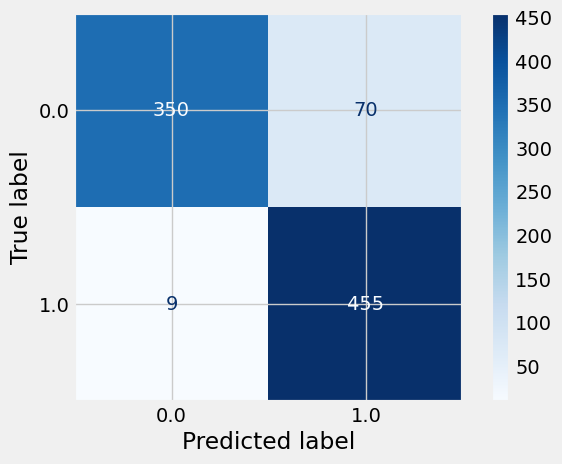

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       420
         1.0       0.87      0.98      0.92       464

    accuracy                           0.91       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.91      0.91       884



In [42]:
ypred_d=evaluation(model_d)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

# Define the model for binary classification
model_n = Sequential()

# Add first dense layer with 64 neurons and ReLU activation
model_n.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add Batch Normalization
model_n.add(BatchNormalization())

# Add second dense layer with 32 neurons and ReLU activation
model_n.add(Dense(32, activation='relu'))

# Add Batch Normalization
model_n.add(BatchNormalization())

# Output layer for binary classification (1 unit with sigmoid activation)
model_n.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid for binary classification

# Compile the model with binary crossentropy loss for binary classification
model_n.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_n.fit(X_train.values, y_transformed, epochs=10, batch_size=32, validation_data=(X_test.values, y_transformed1))

# Evaluate the model
test_loss, test_acc = model_n.evaluate(X_test.values, y_transformed1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7025 - loss: 0.5602 - val_accuracy: 0.8665 - val_loss: 0.4909
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8651 - loss: 0.3350 - val_accuracy: 0.8869 - val_loss: 0.3728
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.3058 - val_accuracy: 0.8790 - val_loss: 0.3148
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.2813 - val_accuracy: 0.8937 - val_loss: 0.2671
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.2406 - val_accuracy: 0.8959 - val_loss: 0.2484
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.2576 - val_accuracy: 0.9027 - val_loss: 0.2345
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9134 - loss: 0.2304 - val_accuracy: 0.9038 - val_loss: 0.2373
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9026 - loss: 0.2312 - val_accuracy: 0.

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


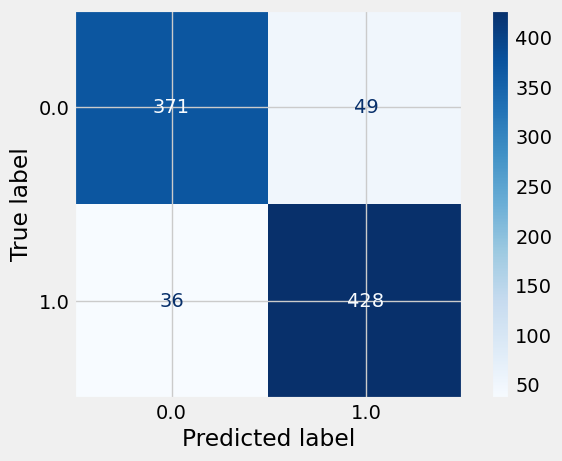

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       420
         1.0       0.90      0.92      0.91       464

    accuracy                           0.90       884
   macro avg       0.90      0.90      0.90       884
weighted avg       0.90      0.90      0.90       884



In [44]:
ypred_n=evaluation(model_n)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the model for binary classification
model_deeper = Sequential()

# Add a deeper layer with 128 neurons and ReLU activation
model_deeper.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add a hidden layer with 64 neurons and ReLU activation
model_deeper.add(Dense(64, activation='relu'))

# Add another hidden layer with 32 neurons and ReLU activation
model_deeper.add(Dense(32, activation='relu'))

# Output layer for binary classification (1 unit with sigmoid activation)
model_deeper.add(Dense(1, activation='sigmoid'))  # Single neuron with sigmoid for binary classification

# Compile the model with binary crossentropy loss for binary classification
model_deeper.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_deeper.fit(X_train.values, y_transformed, epochs=10, batch_size=32, validation_data=(X_test.values, y_transformed1))

# Evaluate the model
test_loss, test_acc = model_deeper.evaluate(X_test.values, y_transformed1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7599 - loss: 0.5332 - val_accuracy: 0.8903 - val_loss: 0.2955
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8628 - loss: 0.3316 - val_accuracy: 0.8857 - val_loss: 0.2695
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.2848 - val_accuracy: 0.8948 - val_loss: 0.2608
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.2651 - val_accuracy: 0.9140 - val_loss: 0.2200
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8995 - loss: 0.2518 - val_accuracy: 0.9106 - val_loss: 0.2254
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8952 - loss: 0.2605 - val_accuracy: 0.8903 - val_loss: 0.2733
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8983 - loss: 0.2507 - val_accuracy: 0.9174 - val_loss: 0.2310
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.2389 - val_accuracy: 0.

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


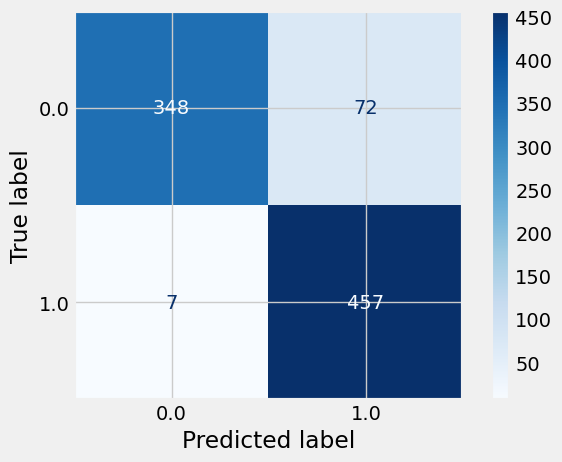

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       420
         1.0       0.86      0.98      0.92       464

    accuracy                           0.91       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.91      0.91       884



In [46]:
ypred_deeper=evaluation(model_deeper)

In [47]:
# Calculating the “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
from sklearn.metrics import roc_curve, auc



fprseq, tprseq, thresholdseq = roc_curve(y_transformed1, ypred_seq)
roc_aucseq = auc(fprseq, tprseq)

fprcnn, tprcnn, thresholdcnn = roc_curve(y_transformed1, ypred_cnn)
roc_auccnn = auc(fprcnn, tprcnn)

fprlstm, tprlstm, thresholdlstm = roc_curve(y_transformed1, ypred_lstm)
roc_auclstm = auc(fprlstm, tprlstm)

fprd, tprd, thresholdd = roc_curve(y_transformed1, ypred_d)
roc_aucd = auc(fprd, tprd)


fprn, tprn, thresholdn = roc_curve(y_transformed1, ypred_n)
roc_aucn = auc(fprn, tprn)


fprdeeper, tprdeeper, thresholddeeper = roc_curve(y_transformed1, ypred_deeper)
roc_aucdeeper = auc(fprdeeper, tprdeeper)





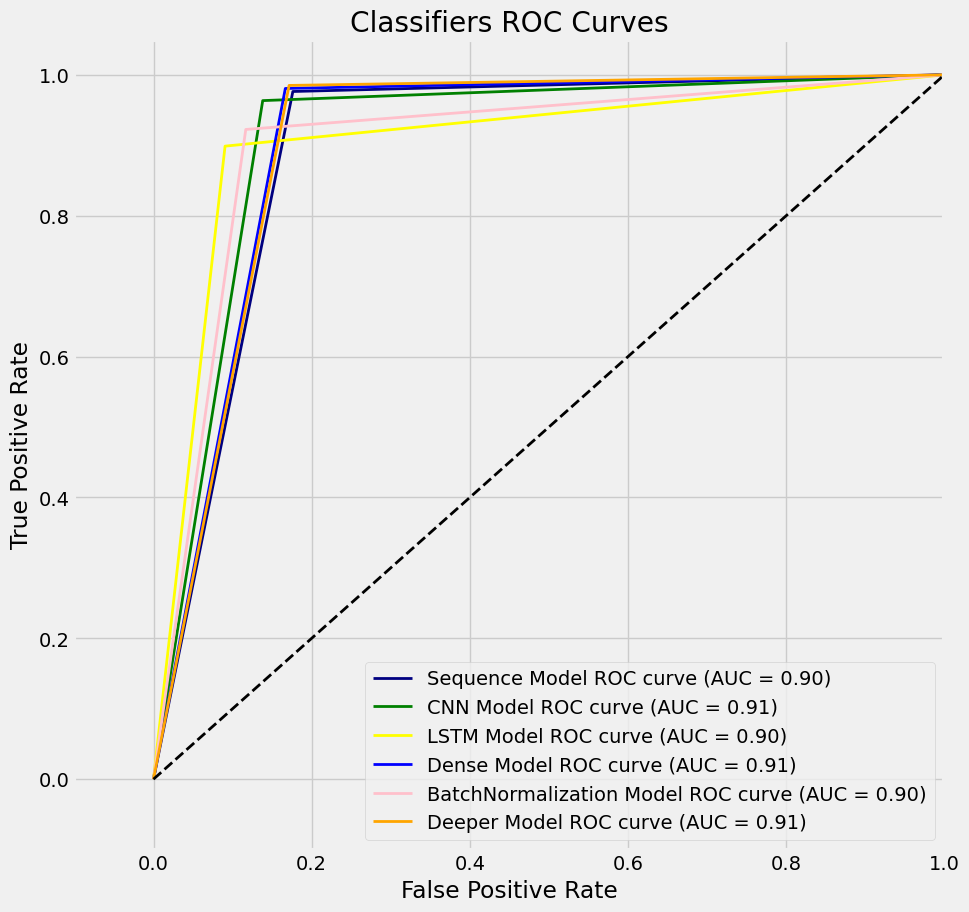

In [48]:
plt.figure(figsize=(10,10))

# Adding the different curves of the six predictive models elaborated in the fourth part
plt.plot(fprseq, tprseq, color='navy', lw=2, label=f'Sequence Model ROC curve (AUC = {roc_aucseq:.2f})')
plt.plot(fprcnn, tprcnn, color='green', lw=2, label=f'CNN Model ROC curve (AUC = {roc_auccnn:.2f})')
plt.plot(fprlstm, tprlstm, color='yellow', lw=2, label=f'LSTM Model ROC curve (AUC = {roc_auclstm:.2f})')
plt.plot(fprd, tprd, color='blue', lw=2, label=f'Dense Model ROC curve (AUC = {roc_aucd:.2f})')
plt.plot(fprn, tprn, color='pink', lw=2, label=f'BatchNormalization Model ROC curve (AUC = {roc_aucn:.2f})')
plt.plot(fprdeeper, tprdeeper, color='orange', lw=2, label=f'Deeper Model ROC curve (AUC = {roc_aucdeeper:.2f})')


# Diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Set limits and labels
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC Curves')
plt.legend(loc='lower right')
plt.show()
